import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [14]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/59

make measure image

In [8]:
def_img = io.imread("image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 1\\2-20-47 PM\\11.26.2020 (1) 1819.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

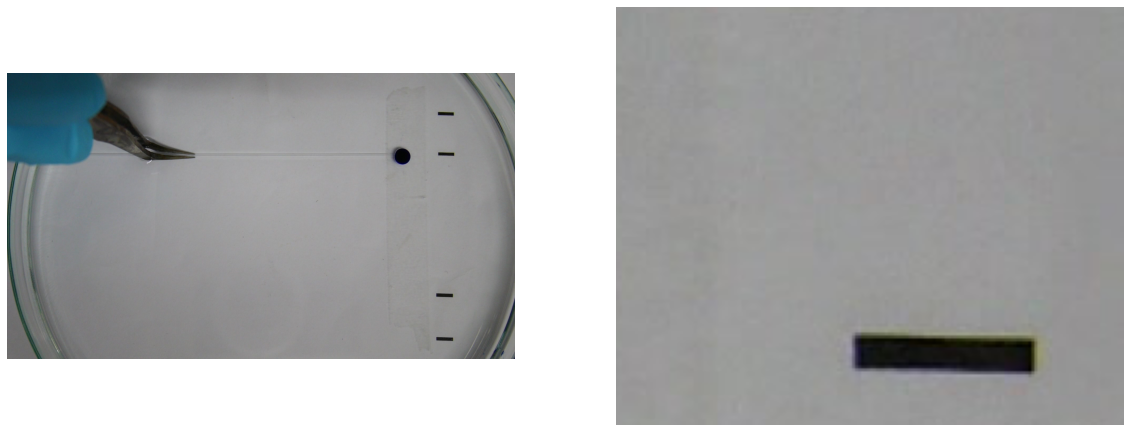

In [11]:
measure_im = crop(def_img, ((190, 750), (1550, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

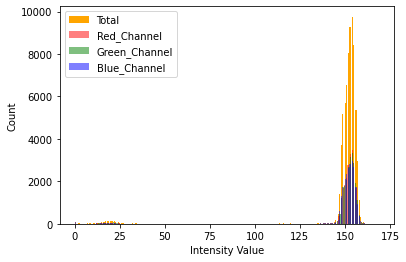

In [12]:
plot_histogram(measure_im)

[116, 80]
[117, 139]


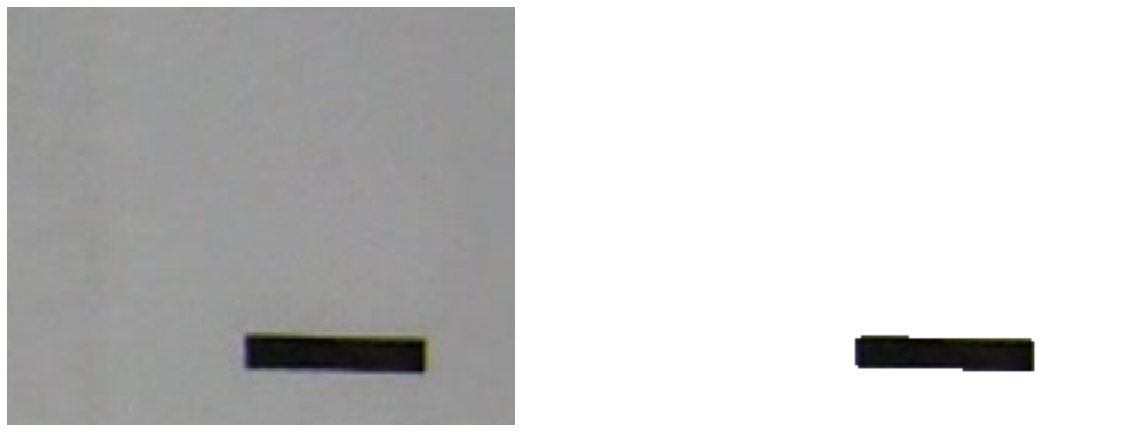

length of picture is  59.00847396772772 pixel


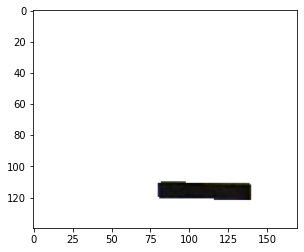

In [13]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

59 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 59


find definition length first picture

(1080, 1920, 3) (180, 850, 3)


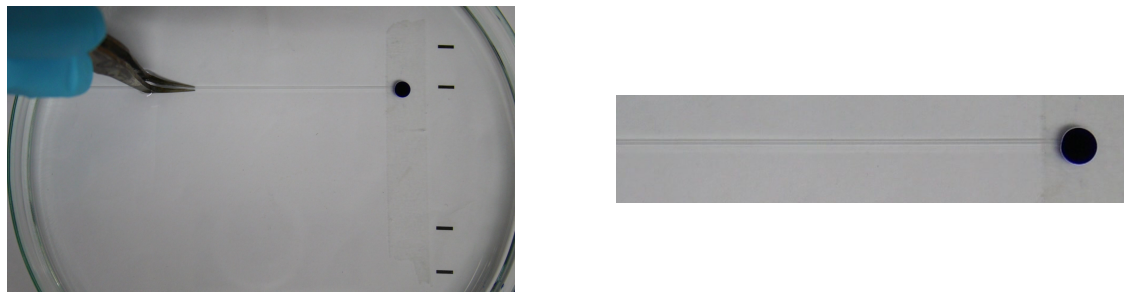

In [22]:
def_crop_im = crop(def_img, ((230, 670), (720, 350), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

In [23]:
# plot_histogram(def_crop_im)

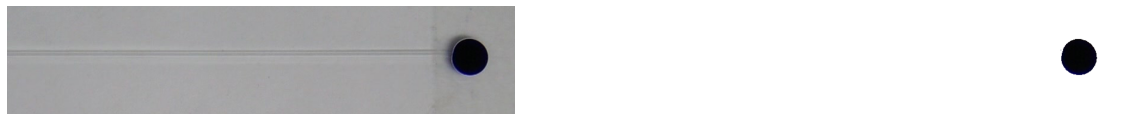

In [24]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[73, 744]
[87, 804]
ldef  61.61168720299745 pixel


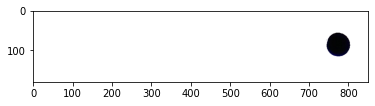

In [25]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1819 to 1948

In [26]:
number_of_picture = 1819
thresh = 45
template1 = []
l_def = 61.61168720299745
for i in range(1948-1819+1):
    if(True) :   
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 1\\2-20-47 PM\\11.26.2020 (1) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((230, 670), (720, 350), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [27]:
print(template1)
print(len(template1))

[0, 0, 4, 10, 14, 23, 32, 41, 50, 59, 66, 75, 83, 90, 96, 104, 111, 118, 124, 130, 137, 143, 149, 155, 161, 168, 173, 178, 184, 191, 196, 202, 208, 214, 218, 222, 229, 234, 239, 245, 250, 256, 261, 266, 270, 276, 280, 285, 291, 296, 300, 305, 310, 314, 319, 323, 328, 333, 337, 342, 347, 351, 356, 360, 365, 370, 374, 379, 383, 387, 392, 396, 400, 405, 408, 412, 417, 421, 425, 429, 433, 437, 442, 446, 450, 454, 458, 462, 466, 470, 474, 478, 483, 487, 491, 495, 499, 503, 507, 510, 514, 518, 522, 526, 529, 533, 537, 539, 543, 546, 550, 554, 558, 562, 565, 569, 572, 576, 579, 585, 590, 592, 594, 600, 605, 608, 612, 616, 620, 624]
130


find length on crop value 2 from 1949 to 3168

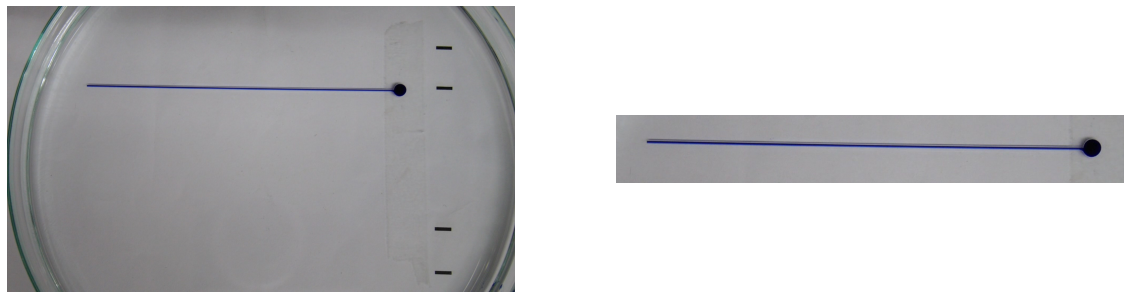

In [30]:
image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 1\\2-20-47 PM\\11.26.2020 (1) " + str(3168).zfill(4) + ".jpg" )
crop_image = crop(image, ((230, 670), (220, 350), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [33]:
number_of_picture = 1949
thresh = 45
template2 = []
l_def = 61.61168720299745
for i in range(3168-1949+1):
    if( True) :
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 1\\2-20-47 PM\\11.26.2020 (1) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((230, 670), (220, 350), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [34]:
print(template2)
print(len(template2))

[626, 631, 634, 637, 641, 647, 650, 652, 656, 659, 663, 666, 671, 675, 678, 682, 684, 688, 691, 695, 698, 702, 705, 710, 713, 716, 719, 722, 726, 729, 733, 736, 740, 743, 746, 750, 753, 756, 759, 763, 766, 769, 773, 776, 779, 782, 785, 788, 791, 794, 798, 801, 804, 807, 810, 813, 816, 819, 822, 825, 829, 832, 835, 838, 841, 844, 846, 850, 853, 856, 859, 861, 864, 867, 870, 872, 876, 879, 881, 884, 887, 890, 893, 895, 898, 901, 903, 906, 908, 911, 913, 916, 918, 920, 923, 925, 929, 931, 933, 936, 937, 940, 942, 944, 947, 949, 952, 954, 956, 958, 960, 962, 964, 966, 968, 970, 972, 974, 976, 977, 979, 981, 983, 985, 986, 988, 990, 991, 994, 995, 997, 999, 1000, 1002, 1004, 1005, 1006, 1008, 1010, 1012, 1014, 1014, 1016, 1018, 1019, 1022, 1023, 1025, 1025, 1027, 1029, 1030, 1033, 1035, 1035, 1037, 1038, 1040, 1041, 1043, 1044, 1046, 1048, 1049, 1051, 1052, 1054, 1055, 1057, 1058, 1060, 1061, 1063, 1064, 1065, 1067, 1068, 1070, 1071, 1073, 1074, 1076, 1078, 1079, 1081, 1082, 1084, 1085, 108

concat 2 template and calculate pixel to centimeter

In [35]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [36]:
print(l_array)

[0.         0.         0.03389831 ... 9.68644    9.694915   9.68644   ]


export data to exel

In [37]:
import pandas as pd

In [38]:
print(len(l_array))

1350


In [39]:
data = []
num_img = 1819
for i in range(len(l_array)):
    data.append(( " 11.26.2020 (1) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.06(1)_11.26.2020_2-20-47-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


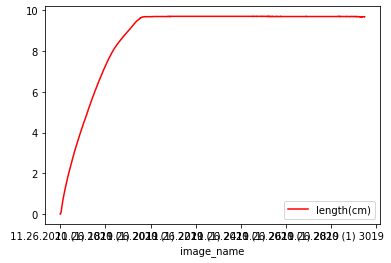

In [40]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()